In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read the dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv("C:/Users/User/Downloads/diabetes_prediction_dataset.csv")
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 1. Dive Into Data

In [4]:
from ydata_profiling import ProfileReport
report = ProfileReport(df, title="Profiling Report", explorative=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.shape

(100000, 9)

In [5]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.duplicated().sum()

3854

In [8]:
# statistical summary of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [9]:
# summary of categorical column
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [10]:
df.corr(numeric_only=True)['diabetes']

age                    0.258008
hypertension           0.197823
heart_disease          0.171727
bmi                    0.214357
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

# 2. Data Cleaning

In [12]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [13]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [11]:
# removing 'Other' from ['gender'] column
#df.drop(df[df['gender']=='Other'].index,inplace=True)
df = df[df['gender'] != 'Other']
df['gender'].value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

In [12]:
# removing duplicate records
df.drop_duplicates(inplace=True)
print(df.shape)

(96128, 9)


# 3. New Features

In [13]:
# creating 10 years age groups
bins =[0,10,20,30,40,50,60,70,80]
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
df['age_group'] = pd.cut(df['age'],bins=bins,labels=labels,right=True)

In [14]:
# creating a new column 'age_stage' based on the age classification
def age_stage(age):
    if age<=1:                    # Infants(0-1)
        return 'Infant'         
    elif age<=12:                 # Children(2-12)
        return 'Child'
    elif age<=19:                 # Teenagers(13-19)
        return 'Teenager'
    elif age<=24:                 # Youths(20-24)
        return 'Youth'
    elif age<=64:                 # Adults(25-64)
        return 'Adult'
    else:                         # Seniors(65 years and over)
        return 'Senior'
df['age_stage'] = df['age'].apply(age_stage)
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,age_stage
77478,Male,48.0,0,1,never,24.10,5.0,145,0,41-50,Adult
57763,Female,56.0,0,0,never,33.75,4.8,140,0,51-60,Adult
41181,Female,80.0,0,0,never,31.39,5.8,126,0,71-80,Senior
9645,Female,4.0,0,0,No Info,17.50,5.8,80,0,0-10,Child
41396,Female,72.0,0,0,not current,27.32,9.0,126,1,71-80,Senior


# 4. EDA

**UV analysis**

gender
Female    56161
Male      39967
Name: count, dtype: int64
None


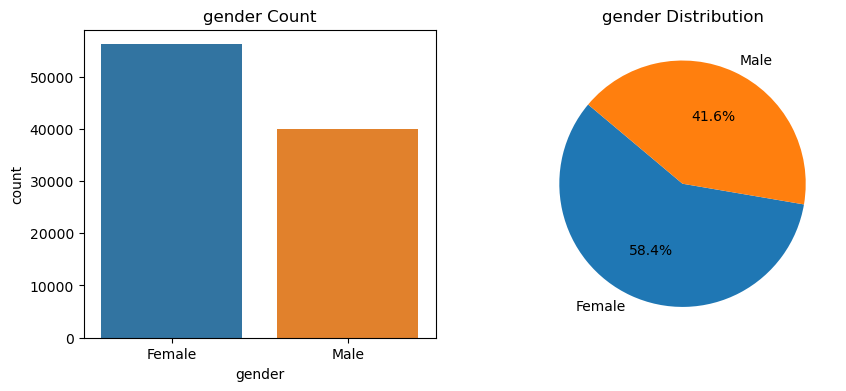

In [15]:
def univariate_analysis(column):
    counts = df[column].value_counts(normalize=True) * 100
    print(df[column].value_counts())
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.countplot(data=df,x=column)
    plt.title(column+' Count')

    plt.subplot(122)
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=140)
    plt.title(column+' Distribution')
    
print(univariate_analysis('gender'))

hypertension
0    88667
1     7461
Name: count, dtype: int64
None


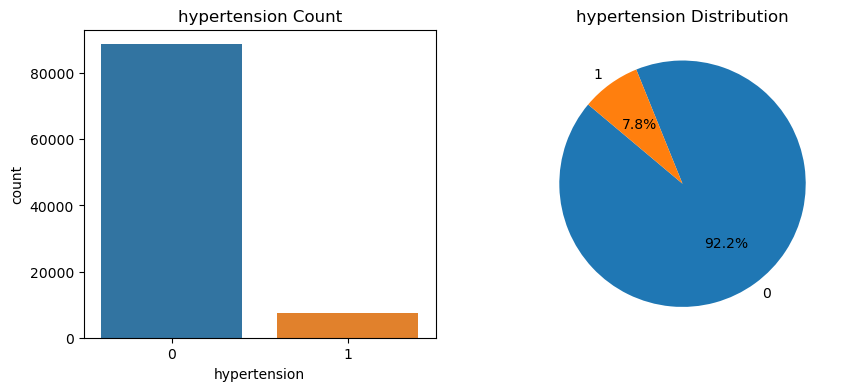

In [16]:
print(univariate_analysis('hypertension'))

heart_disease
0    92205
1     3923
Name: count, dtype: int64
None


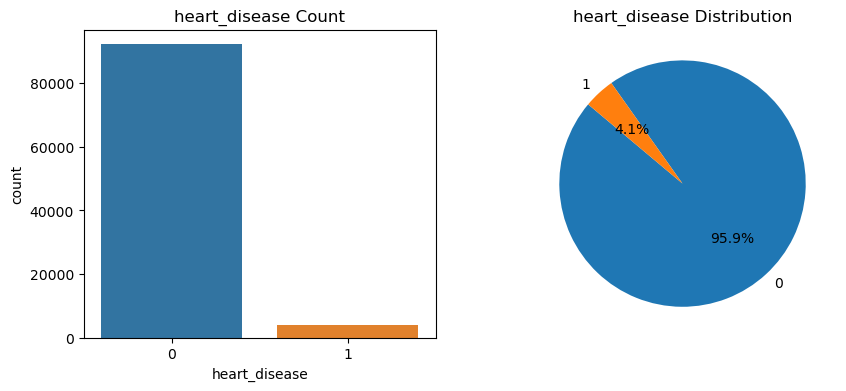

In [17]:
print(univariate_analysis('heart_disease'))

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64
None


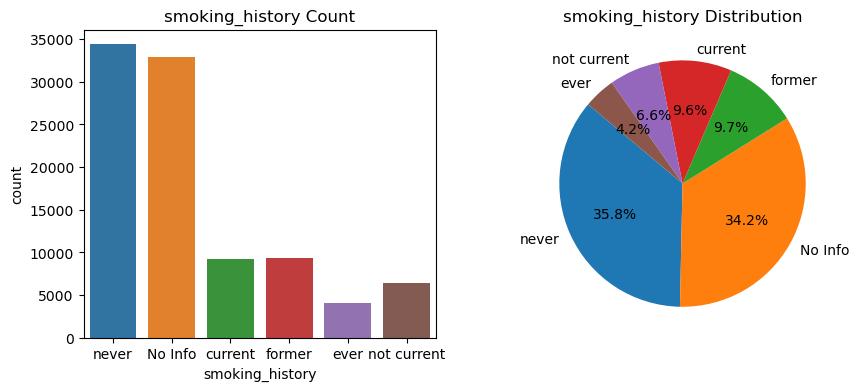

In [18]:
print(univariate_analysis('smoking_history'))

diabetes
0    87646
1     8482
Name: count, dtype: int64
None


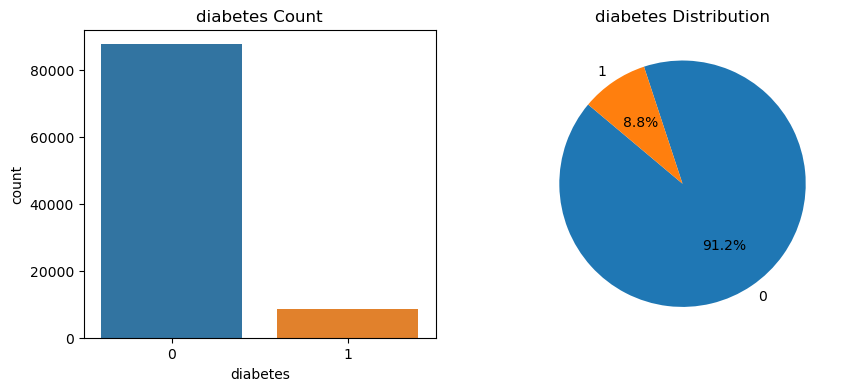

In [19]:
print(univariate_analysis('diabetes'))

age_group
51-60    14381
41-50    14110
31-40    12625
21-30    12202
71-80    11557
61-70    11048
0-10     10322
11-20     9883
Name: count, dtype: int64
None


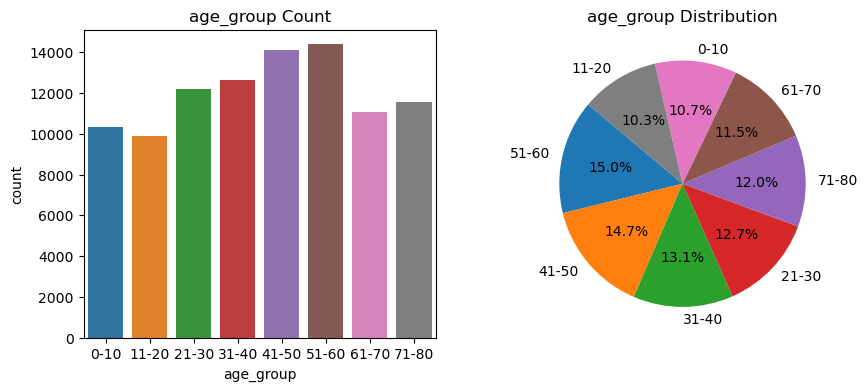

In [20]:
print(univariate_analysis('age_group'))

age_stage
Adult       53525
Senior      17656
Child       10992
Teenager     7040
Youth        5922
Infant        993
Name: count, dtype: int64
None


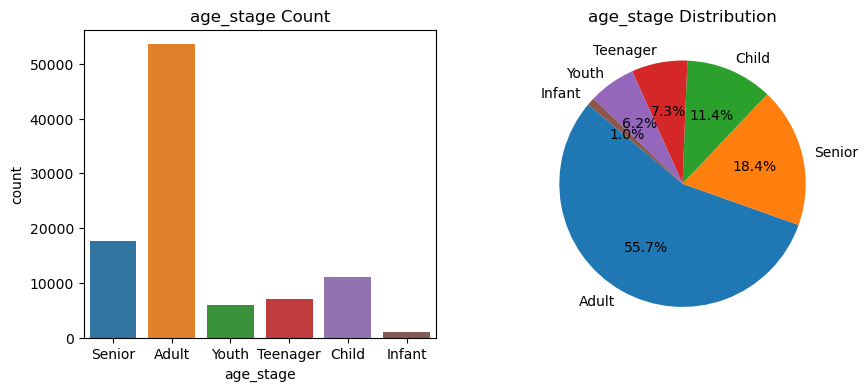

In [21]:
print(univariate_analysis('age_stage'))

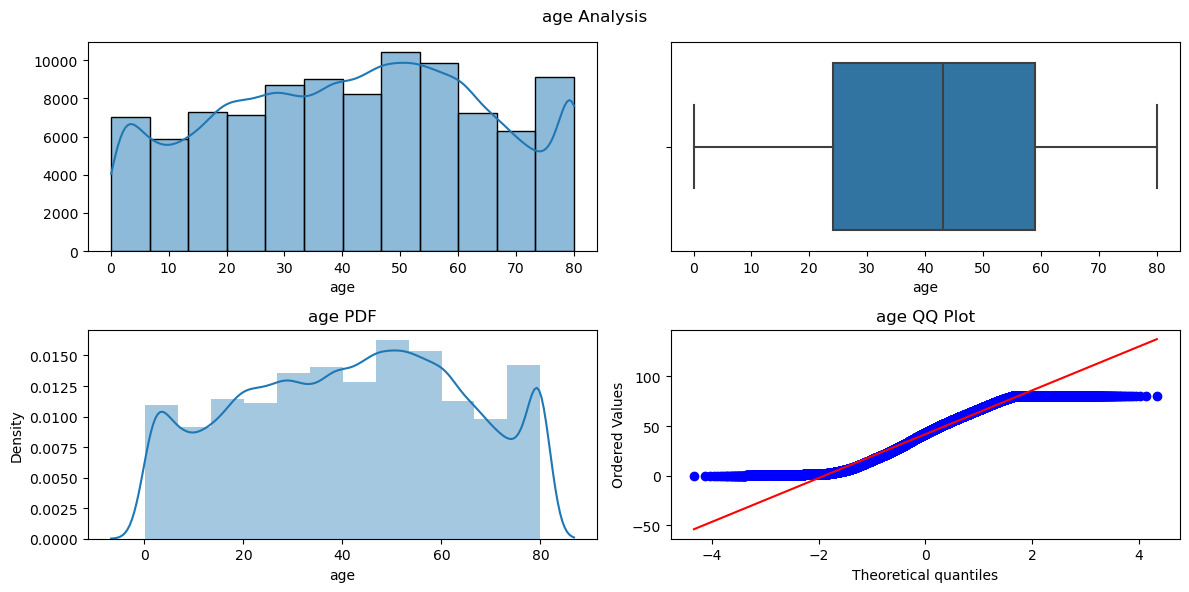

In [24]:
import scipy.stats as stats
def uv_analysis(col):
    plt.figure(figsize=(12,6))

    plt.suptitle(col+' Analysis')
    plt.subplot(221)
    sns.histplot(df[col],kde=True,bins=12)
    plt.ylabel('')

    plt.subplot(222)
    sns.boxplot(x=df[col])

    plt.subplot(223)
    plt.title(col+' PDF')
    sns.distplot(df[col],bins=12)

    plt.subplot(224)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title(col+' QQ Plot')
    plt.tight_layout()
    return ''
print(uv_analysis('age'))

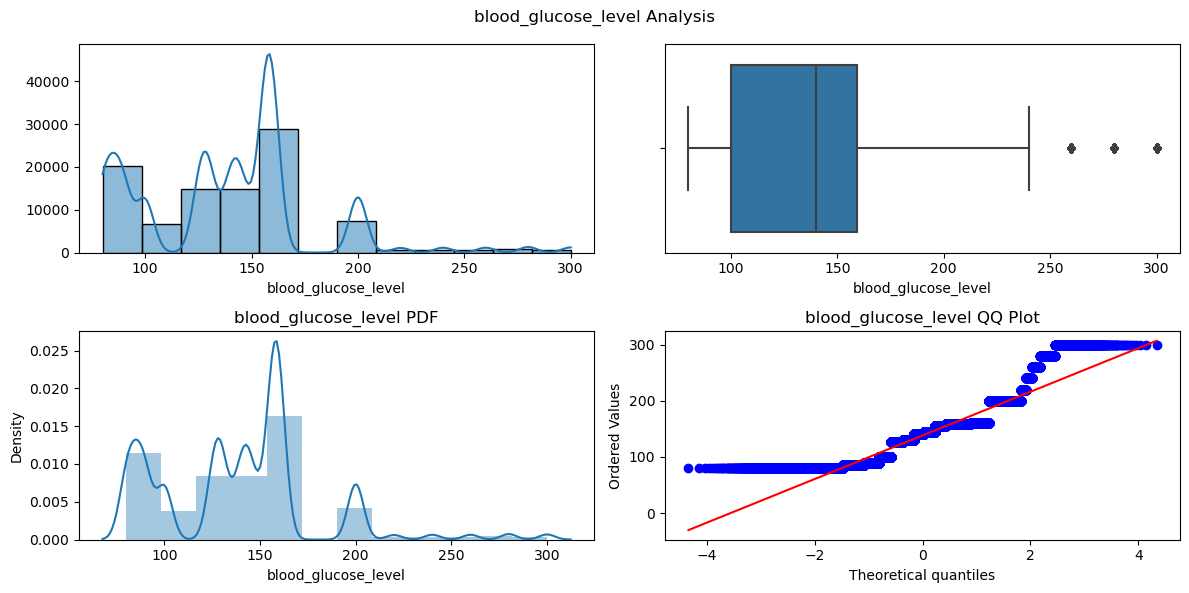

In [25]:
print(uv_analysis('blood_glucose_level'))

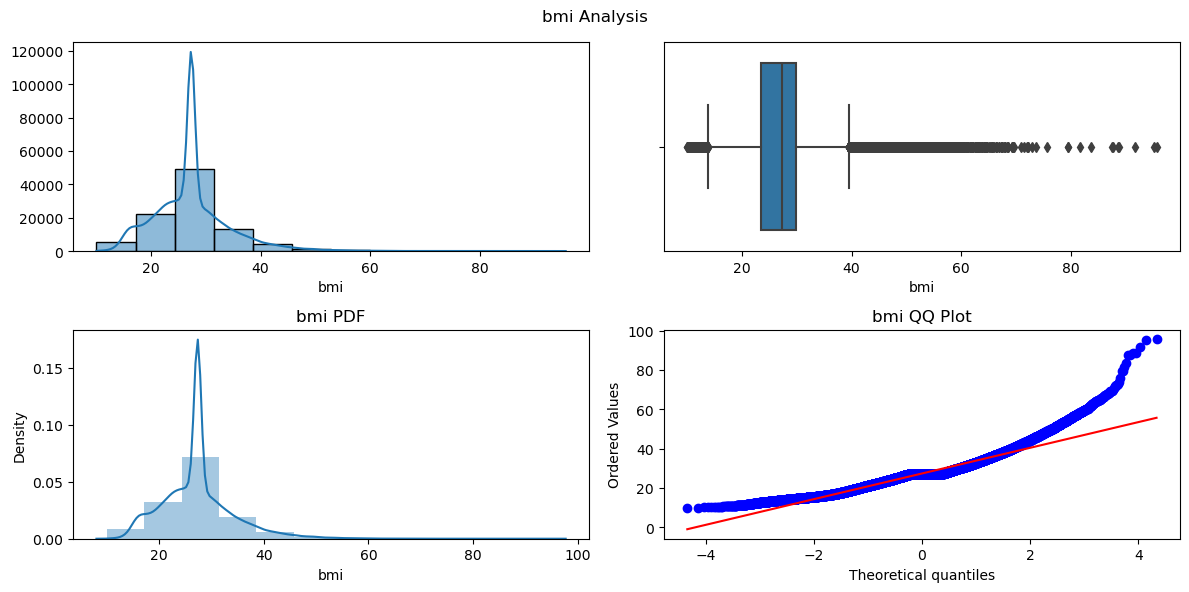

In [27]:
print(uv_analysis('bmi'))

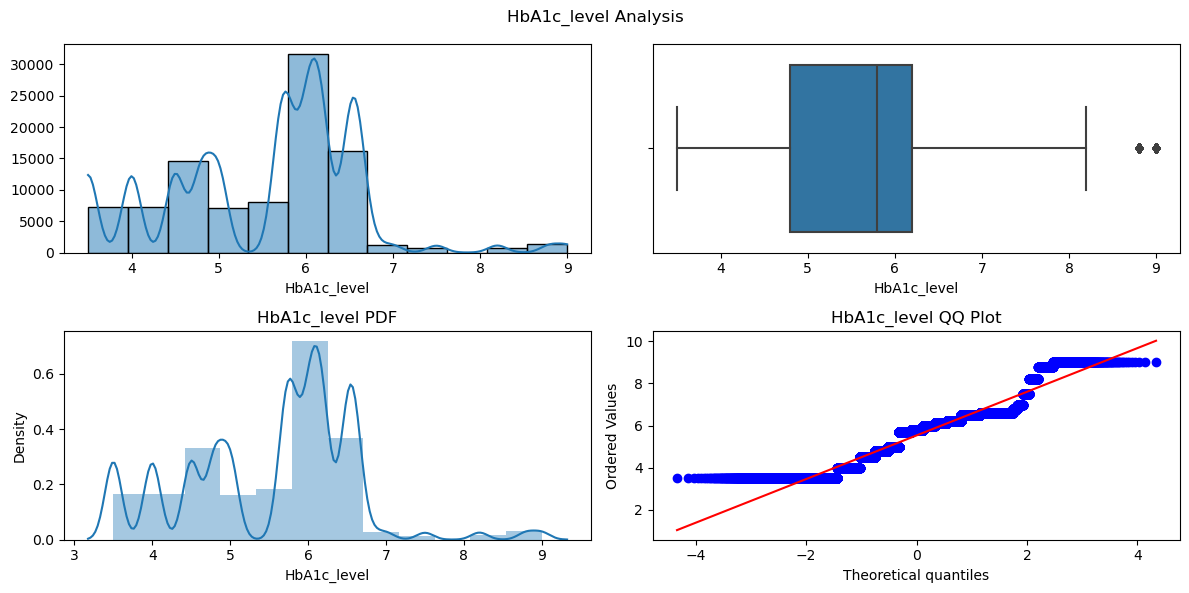

In [28]:
print(uv_analysis('HbA1c_level'))

**BV Analysis**

In [26]:
df.sample(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,age_stage
31690,Female,75.0,0,0,former,32.34,7.5,260,1,71-80,Senior
15427,Female,5.0,0,0,No Info,18.38,6.6,100,0,0-10,Child


AttributeError: 'numpy.int64' object has no attribute 'startswith'

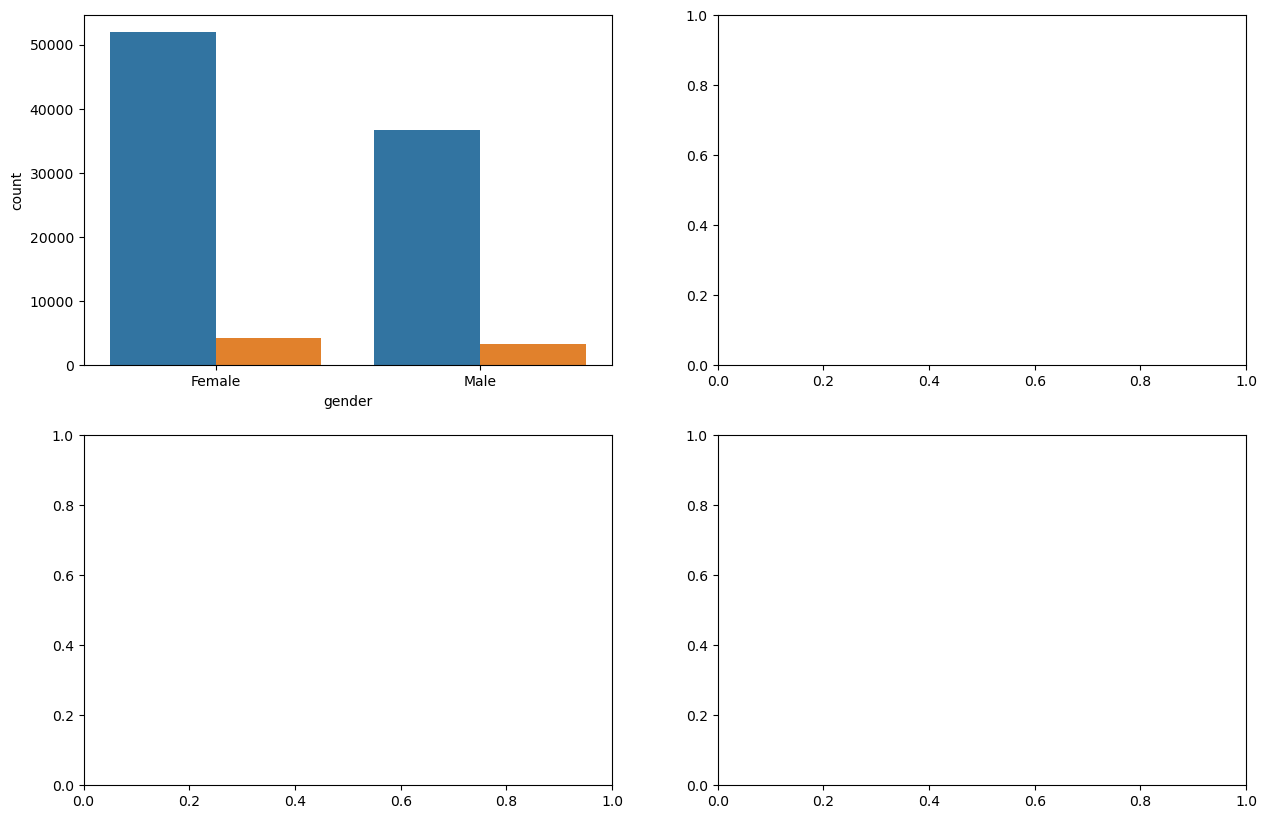

In [30]:
# features for gender based analysis
legend = ['hypertension', 'heart_disease', 'smoking_history','diabetes']
# plotting countplots
fig,ax = plt.subplots(2,2,figsize=(15,10))
for i in range(len(legend)):
    rows = i//2
    cols = i%2
    sns.countplot(data=df,x='gender',hue=legend[i],ax=ax[rows,cols])
    # Annotating count values on top of each bar in the count plot
    for p in ax[rows,cols].patches:
        ax[rows,cols].annotate(format(p.get_height(),'.0f'),
                      (p.get_x()+ p.get_width()/2.,p.get_height()),
                      ha='center',va='center',
                      xytext = (0,8),
                      textcoords = 'offset points')
    # setting title for each plot
    ax[rows,cols].set_title(f'Countplot of {legend[i]}')
    ax[rows,cols].set_ylabel("")
plt.tight_layout()
plt.show()

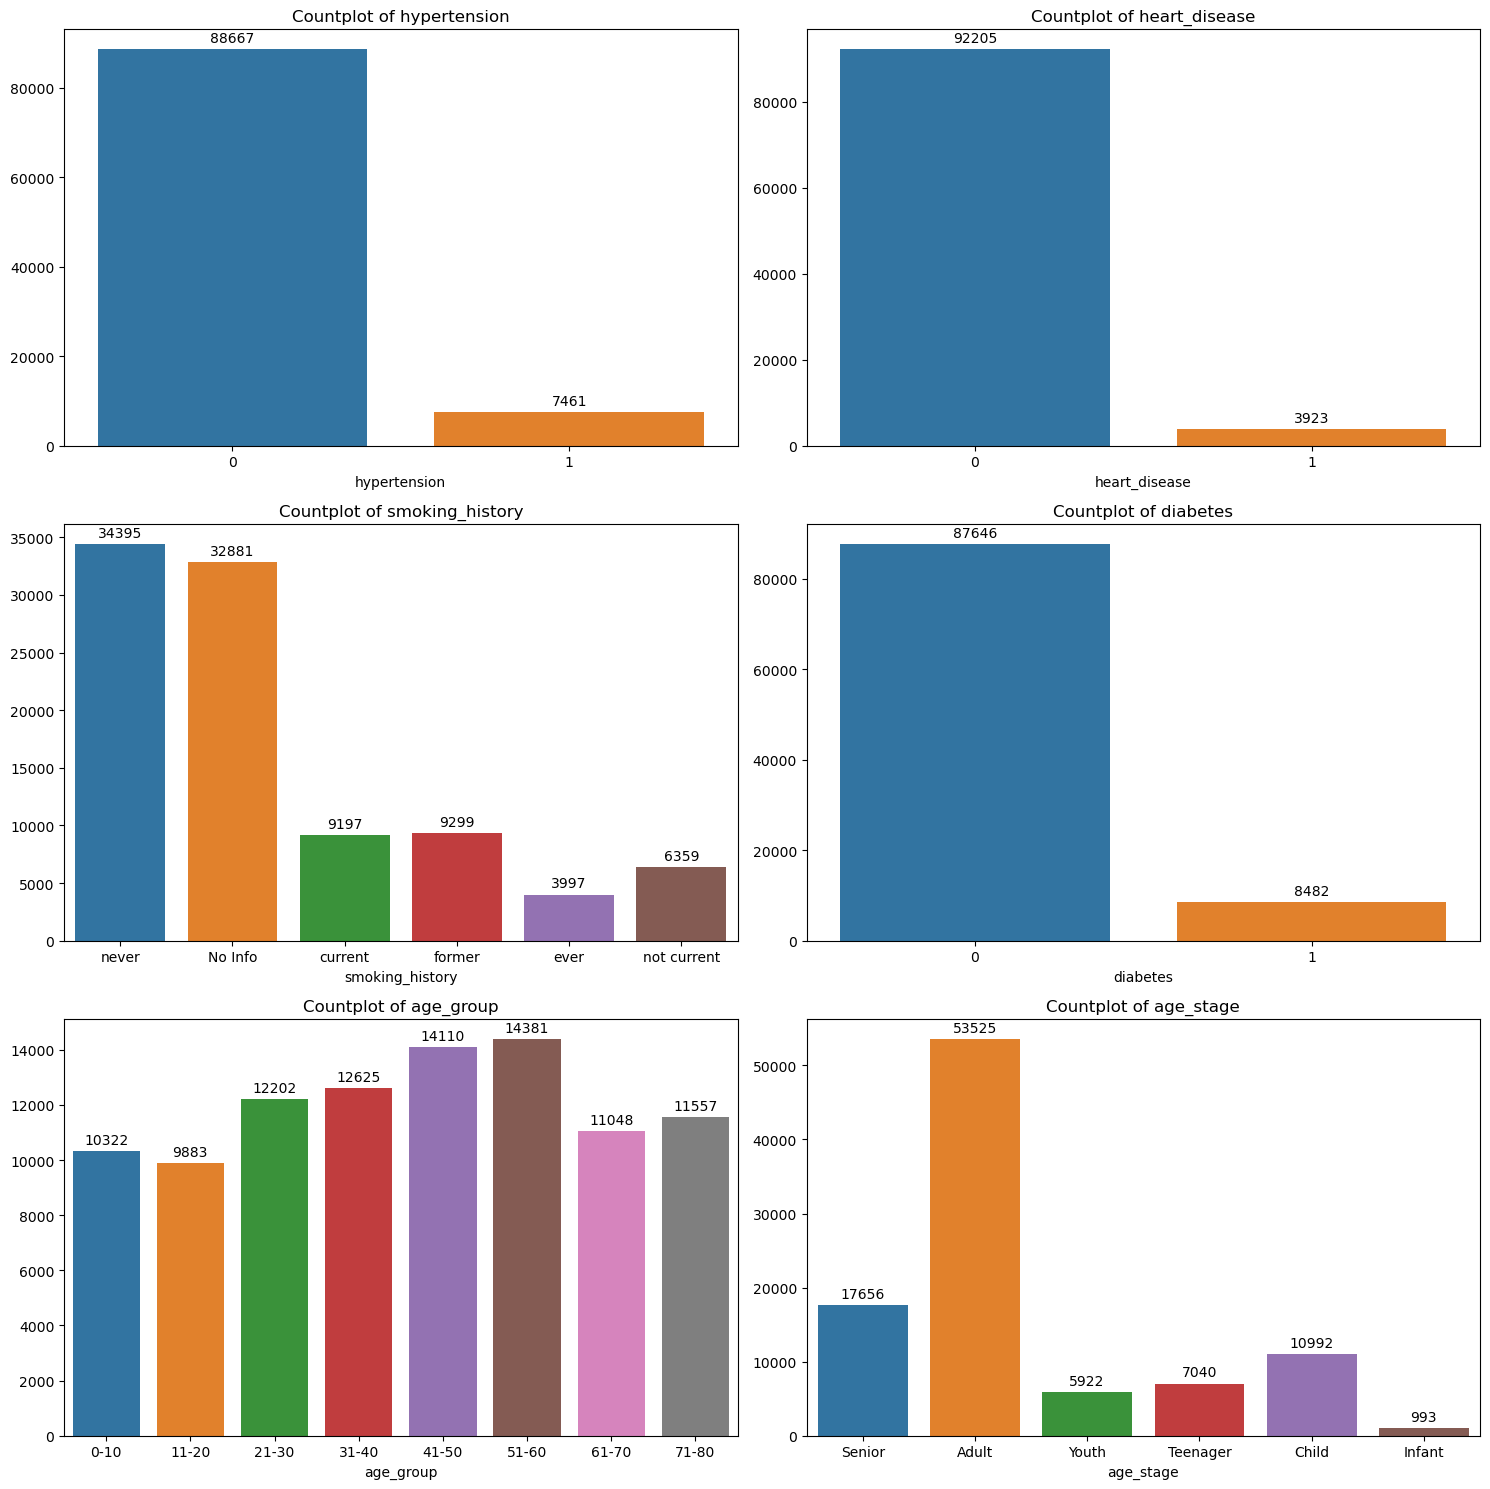

In [13]:
# features for  analysis
features = ['hypertension', 'heart_disease', 'smoking_history','diabetes','age_group','age_stage']
# plotting countplots
fig,ax = plt.subplots(3,2,figsize=(15,15))
for i in range(len(features)):
    rows = i//2
    cols = i%2
    sns.countplot(data=df,x=features[i],ax=ax[rows,cols])
    # Annotating count values on top of each bar in the count plot
    for p in ax[rows,cols].patches:
        ax[rows,cols].annotate(format(p.get_height(),'.0f'),
                      (p.get_x()+ p.get_width()/2.,p.get_height()),
                      ha='center',va='center',
                      xytext = (0,8),
                      textcoords = 'offset points')
    # setting title for each plot
    ax[rows,cols].set_title(f'Countplot of {features[i]}')
    ax[rows,cols].set_ylabel("")
plt.tight_layout()
plt.show()

**4.1 Gender Based Analysis**

[]

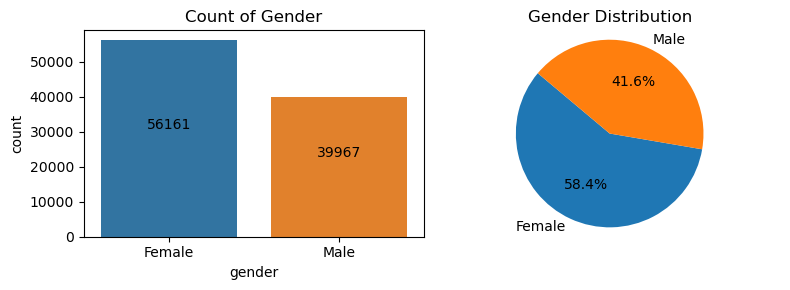

In [14]:
# count of each gender category
gender_counts = df['gender'].value_counts(normalize=True) * 100
# Create a figure with subplots
fig , ax = plt.subplots(1,2,figsize=(8,3))
# Plotting using Seaborn countplot in the first subplot
sns.countplot(data=df,x="gender",ax=ax[0])
ax[0].set_title("Count of Gender")
# Plotting the pie chart in the second subplot 
ax[1].pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', startangle=140)
ax[1].set_title('Gender Distribution')
ax[1].axis('equal')
# Annotating count values on top of each bar in the count plot
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.tight_layout()
plt.plot()

In [16]:
# only male
df_male = df[df['gender']=='Male']
# only female
df_female = df[df['gender']=='Female']

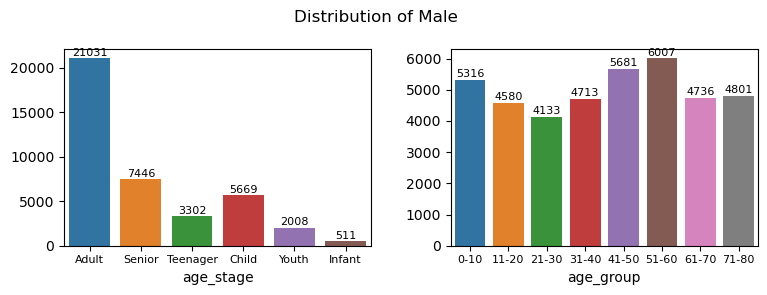

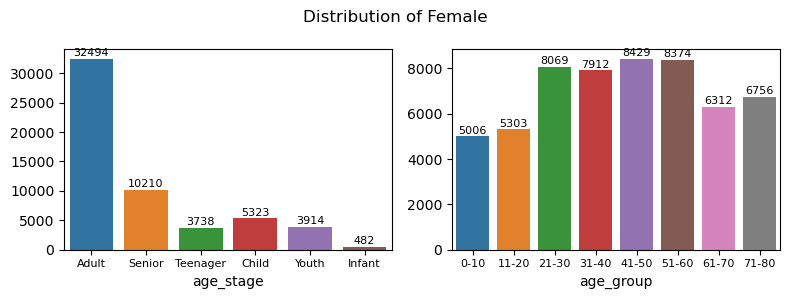

In [17]:
# plotting age_group and age_stage countplot separately
# figure-1  only for male
fig1,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
fig1.suptitle('Distribution of Male') # title
sns.countplot(data=df_male,x='age_stage',ax=ax1) # age_stage
sns.countplot(data=df_male,x='age_group',ax=ax2) # age_group
plt.tight_layout()
# figure-2 only for female
fig2,(ax3,ax4) = plt.subplots(1,2,figsize=(8,3))
fig2.suptitle("Distribution of Female") # title
sns.countplot(data=df_female,x='age_stage',ax=ax3,order=['Adult','Senior','Teenager','Child','Youth','Infant']) # age_stage
sns.countplot(data=df_female,x='age_group',ax=ax4) # age_group
# reducing xticks font size and adding bar label
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='x', labelsize=8) 
    ax.set_ylabel("")
    # bar label
    for p in ax.patches:
        ax.annotate(format(p.get_height(),'.0f'),
                      (p.get_x()+ p.get_width()/2.,p.get_height()),
                      ha='center',va='center',
                      xytext = (0,4),
                      textcoords = 'offset points',
                   fontsize=8)
        
plt.tight_layout()
plt.show()

**4.2 Diabetic Patients having 'hypertension' and 'heart_disease'.**

In [18]:
# patients having health problem
df_patient = df[(df['hypertension']==1) & (df['heart_disease']==1) & (df['diabetes']==1)]
df_patient

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,age_stage
242,Male,57.0,1,1,not current,27.77,6.6,160,1,51-60,Adult
1022,Female,62.0,1,1,former,44.23,8.2,145,1,61-70,Adult
1135,Female,62.0,1,1,never,43.16,8.8,280,1,61-70,Adult
1277,Female,67.0,1,1,current,28.52,6.5,200,1,61-70,Senior
1942,Male,72.0,1,1,never,33.45,8.2,240,1,71-80,Senior
...,...,...,...,...,...,...,...,...,...,...,...
99398,Female,76.0,1,1,current,21.64,8.8,160,1,71-80,Senior
99523,Female,80.0,1,1,current,19.25,8.8,200,1,71-80,Senior
99572,Female,80.0,1,1,former,32.21,6.5,200,1,71-80,Senior
99723,Male,61.0,1,1,former,35.78,6.0,145,1,61-70,Adult


Text(0.5, 1.0, 'Number of patients having all three problem.')

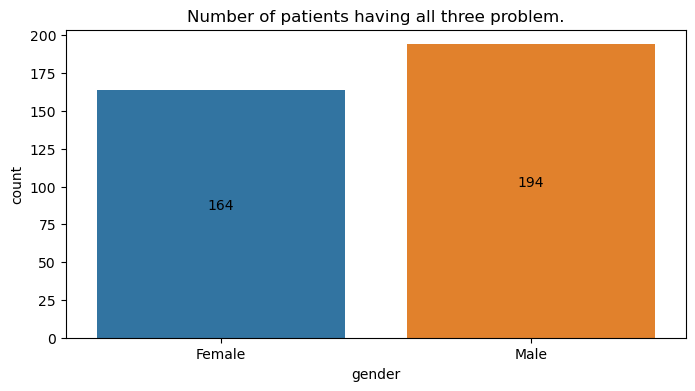

In [19]:
# number of  male and female patients having ill health condition
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df_patient,x='gender',order=['Female','Male'])
for p in ax.patches:
        ax.annotate(format(p.get_height(),'.0f'),
                      (p.get_x()+ p.get_width()/2.,p.get_height()/2),
                      ha='center',va='center',
                      xytext = (0,6),
                      textcoords = 'offset points')
plt.title('Number of patients having all three problem.')

Text(0.5, 1.0, 'Overview of smoking_history.')

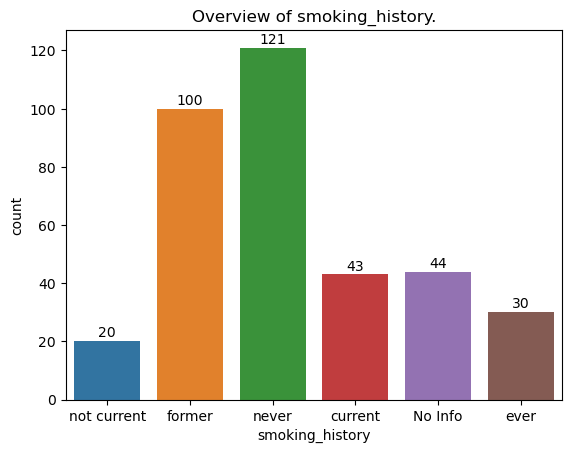

In [20]:
# countplot of  diabetic patients with heart_disease and hypertension
plt.figure()
ax = sns.countplot(data=df_patient,x='smoking_history')
for p in ax.patches:
        ax.annotate(format(p.get_height(),'.0f'),
                      (p.get_x()+ p.get_width()/2.,p.get_height()),
                      ha='center',va='center',
                      xytext = (0,6),
                      textcoords = 'offset points')
plt.title('Overview of smoking_history.')

**4.3 People having good health i.e. No diabetes, No hypertension, No heart_disease.**

In [21]:
# people with good health
df_good = df[(df['hypertension']==0) & (df['heart_disease']==0) & (df['diabetes']==0)]
df_good

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,age_stage
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,51-60,Adult
2,Male,28.0,0,0,never,27.32,5.7,158,0,21-30,Adult
3,Female,36.0,0,0,current,23.45,5.0,155,0,31-40,Adult
5,Female,20.0,0,0,never,27.32,6.6,85,0,11-20,Youth
7,Female,79.0,0,0,No Info,23.86,5.7,85,0,71-80,Senior
...,...,...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0,31-40,Adult
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,0-10,Child
99997,Male,66.0,0,0,former,27.83,5.7,155,0,61-70,Senior
99998,Female,24.0,0,0,never,35.42,4.0,100,0,21-30,Youth


Text(0.5, 1.0, 'Number of patients having good health.')

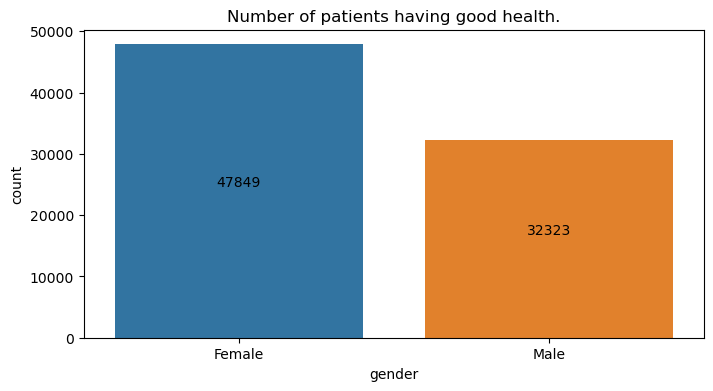

In [22]:
# number of  male and female having good health
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df_good,x='gender')
for p in ax.patches:
        ax.annotate(format(p.get_height(),'.0f'),
                      (p.get_x()+ p.get_width()/2.,p.get_height()/2),
                      ha='center',va='center',
                      xytext = (0,6),
                      textcoords = 'offset points')
plt.title('Number of patients having good health.')

**4.4 Comparative Analysis** 

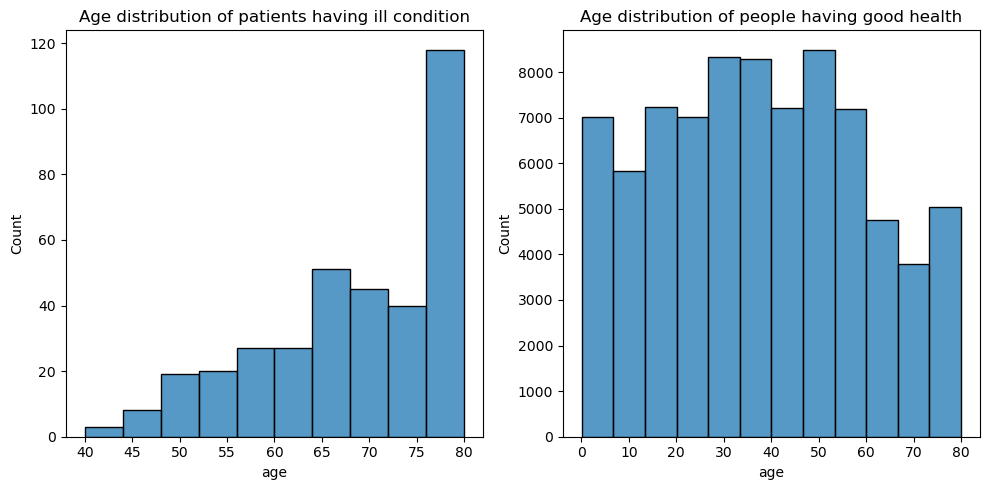

In [23]:
# distribution of age 
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df_patient['age'],ax=ax[0])
sns.histplot(df_good['age'],ax=ax[1],bins=12)
ax[0].set_title('Age distribution of patients having ill condition')
ax[1].set_title('Age distribution of people having good health')
plt.tight_layout()

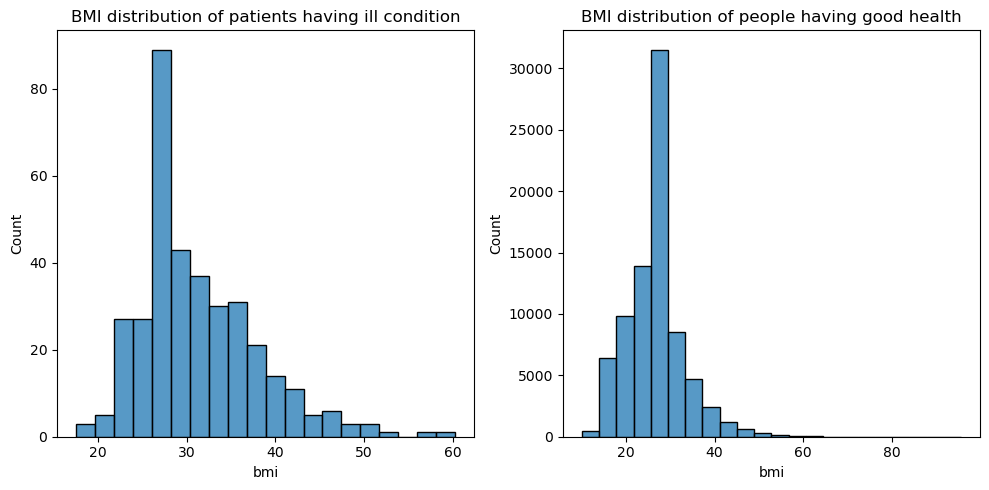

In [24]:
# distribution of bmi 
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df_patient['bmi'],ax=ax[0])
sns.histplot(df_good['bmi'],ax=ax[1],bins=22)
ax[0].set_title('BMI distribution of patients having ill condition')
ax[1].set_title('BMI distribution of people having good health')
plt.tight_layout()

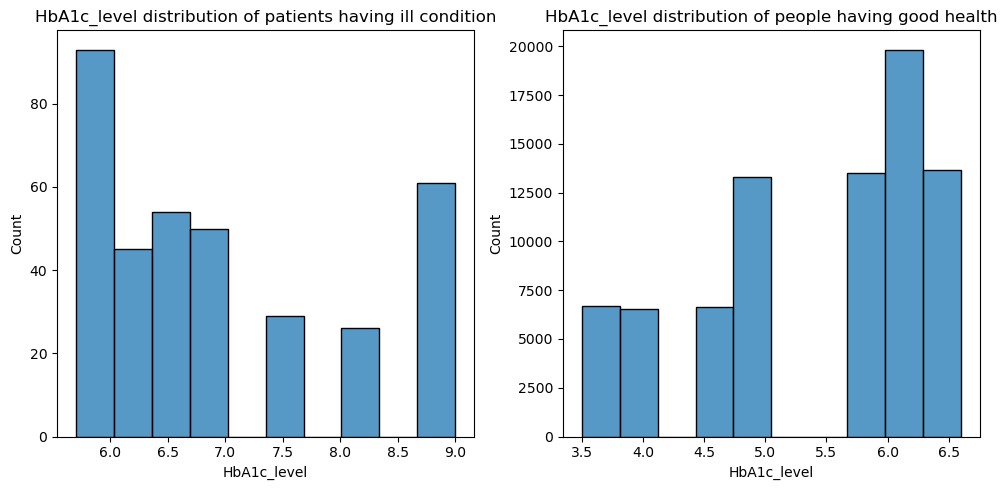

In [25]:
# distribution of age 
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df_patient['HbA1c_level'],ax=ax[0])
sns.histplot(df_good['HbA1c_level'],ax=ax[1],bins=10)
ax[0].set_title('HbA1c_level distribution of patients having ill condition')
ax[1].set_title('HbA1c_level distribution of people having good health')
plt.tight_layout()

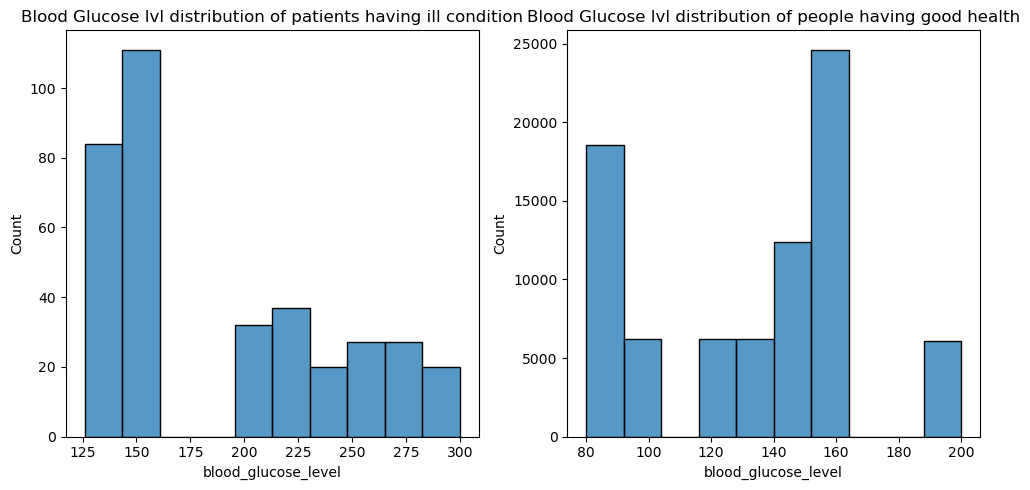

In [26]:
# distribution of blood_glucose_level
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df_patient['blood_glucose_level'],ax=ax[0])
sns.histplot(df_good['blood_glucose_level'],ax=ax[1],bins=10)
ax[0].set_title('Blood Glucose lvl distribution of patients having ill condition')
ax[1].set_title('Blood Glucose lvl distribution of people having good health')
plt.tight_layout()

In [27]:
# age stage analysis
print("People having good health:")
print(df_good['age_stage'].value_counts())

People having good health:
Adult       45150
Child       10948
Senior      10277
Teenager     6963
Youth        5841
Infant        993
Name: age_stage, dtype: int64


In [28]:
print("Patients having ill health condition:") # have all three problem (heart_disease, hypertension, diabetes)
print(df_patient['age_stage'].value_counts())

Patients having ill health condition:
Senior    238
Adult     120
Name: age_stage, dtype: int64


# 5. Data Preprocessing

In [29]:
# Label encoder to transform categorical data to numeric 
from sklearn.preprocessing import LabelEncoder
# coping data set thus main data remain unchanged
df1 = df.copy()
# defining a function that encode data
def label_encoder(data):
    label = LabelEncoder()
    columns = data.select_dtypes(include=['object','category']).columns.tolist()
    for i in range(len(columns)):
        data[columns[i]] = label.fit_transform(data[columns[i]])
        mapping = dict(zip(label.classes_, label.transform(label.classes_)))
        print(f'Mapping for {columns[i]}:', mapping )
    return data.head()
label_encoder(df1)

Mapping for gender: {'Female': 0, 'Male': 1}
Mapping for smoking_history: {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}
Mapping for age_group: {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7}
Mapping for age_stage: {'Adult': 0, 'Child': 1, 'Infant': 2, 'Senior': 3, 'Teenager': 4, 'Youth': 5}


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,age_stage
0,0,80.0,0,1,4,25.19,6.6,140,0,7,3
1,0,54.0,0,0,0,27.32,6.6,80,0,5,0
2,1,28.0,0,0,4,27.32,5.7,158,0,2,0
3,0,36.0,0,0,1,23.45,5.0,155,0,3,0
4,1,76.0,1,1,1,20.14,4.8,155,0,7,3
